# Police Shootings in USA

To create this analysis, only the information contained in the original dataset was analyzed. The proportion of the population of ethnic groups in North American territory, such an analysis would probably reveal a more xenophobic and racist face of the U.S police forces. <br><br><b>#BlackLivesMatter</b>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
file= 'input/fatal-police-shootings-data.csv'
df= pd.read_csv(file)
df.sample(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
4000,4397,Horacio Ruiz-Rodriguez,2019-01-21,shot,unarmed,37.0,M,H,Las Vegas,NV,True,other,Car,False
2005,2245,Melvin DeLong,2017-01-18,shot,gun,28.0,M,N,Grand Forks,ND,False,attack,Not fleeing,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

## Gender Analysis

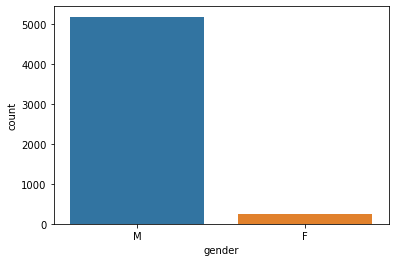

In [4]:
ax= sns.countplot(x=df['gender'], data= df)

In [5]:
gender_EDA= (df['gender'].value_counts(normalize= True)*100).round(2)
print(f'{gender_EDA.M}% of deaths caused by  U.S police are men.')

95.6% of deaths caused by  U.S police are men.


## Age analysis

In [6]:
age= df['age'].value_counts().to_frame().T
age.index= ['Total']
age

,31.0,25.0,33.0,27.0,29.0,32.0,34.0,36.0,24.0,28.0,...,82.0,86.0,80.0,6.0,91.0,89.0,12.0,78.0,13.0,79.0
Total,186,183,171,171,169,168,167,157,157,156,...,2,2,2,2,1,1,1,1,1,1


In [7]:
age_slice= [0,10,20,30,40,50,60,70,80,90,100] #USAR UMA FUNÇÂO PRA GERAR 
labels= ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
age_EDA= (pd.cut(x=df['age'], bins= age_slice,labels=labels, include_lowest=True)).value_counts(sort= False)
age_EDA

0-10         2
10-20      369
20-30     1487
30-40     1517
40-50      933
50-60      579
60-70      227
70-80       51
80-90       15
90-100       1
Name: age, dtype: int64

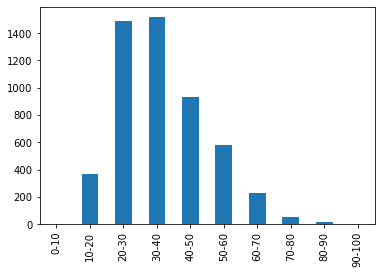

In [8]:
ax= age_EDA.plot.bar(figsize= (6,4))

In [9]:
print('Most of the deaths occured between citizens with 20 and 40 years.')

Most of the deaths occured between citizens with 20 and 40 years.


## Race analysis

In [10]:
race_dictionary= {
    'W': 'White',
    'B': 'Black',
    'A': 'Asian',
    'N': 'Native American',
    'H': 'Hispanic',
    'O': 'Others'}

df['race']= df['race'].map(race_dictionary)

In [11]:
races= df['race'].value_counts().to_frame()
races.columns= ['Deaths']
races

,Deaths
White,2476
Black,1298
Hispanic,902
Asian,93
Native American,78
Others,48


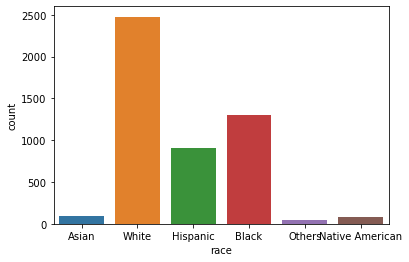

In [12]:
ax= sns.countplot(x='race', data= df)

In [13]:
race_EDA= df.groupby('race')['age'].mean()
race_EDA

race
Asian              36.549451
Black              32.463893
Hispanic           33.589977
Native American    31.662338
Others             32.978723
White              39.947196
Name: age, dtype: float64

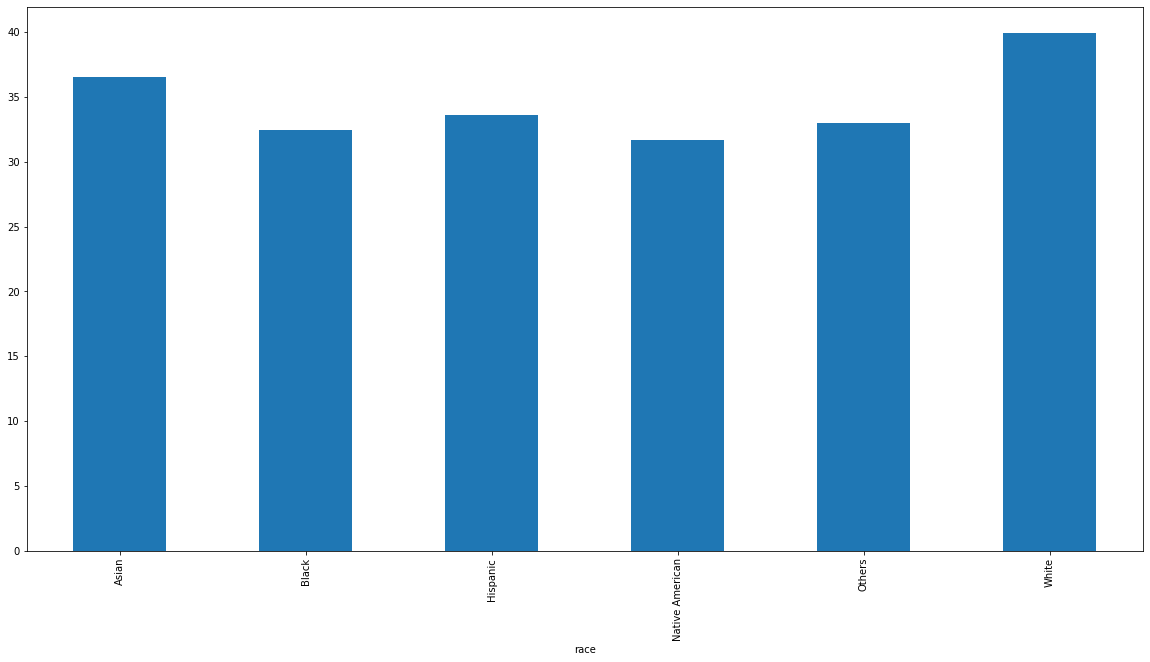

In [14]:
ax= race_EDA.plot.bar(figsize= (20,10))

In [15]:
print('All victims have an approximate average age, however the average age of white people is higher than other races.')

All victims have an approximate average age, however the average age of white people is higher than other races.


In [16]:
race_EDA= pd.crosstab(df['state'], df['race'])
race_EDA

race,Asian,Black,Hispanic,Native American,Others,White
state,,,,,,
AK,2,3,0,9,0,22
AL,0,31,1,0,0,63
AR,1,26,0,0,0,46
AZ,0,17,83,13,0,109
CA,29,122,316,4,9,221
CO,5,18,48,4,2,91
CT,0,3,6,0,0,11
DC,0,12,0,0,0,1
DE,0,5,0,0,0,5


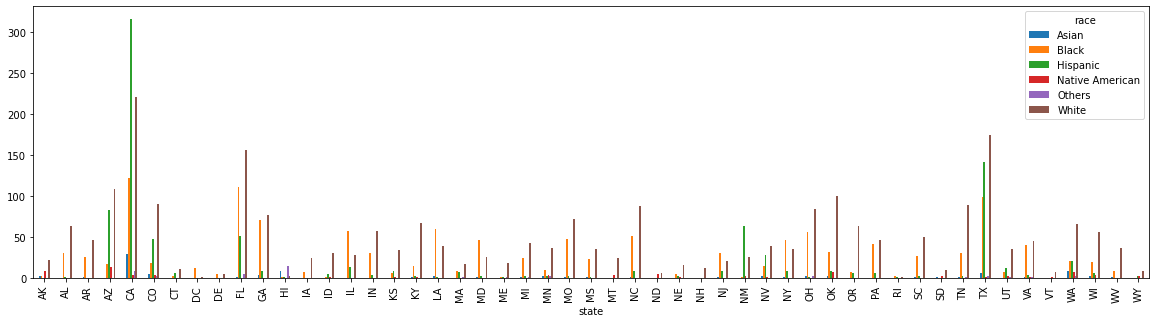

In [17]:
ax= race_EDA.plot.bar(figsize= (20,5))

In [18]:
print('States like Arizona and New Mexico have a much higher death rate against Hispanics compared to other states. Whereas states like Illinois, West Virginia, New Jersey, Maryland and Louisiania are more common the death of black citiezens in comparison to the others.')

States like Arizona and New Mexico have a much higher death rate against Hispanics compared to other states. Whereas states like Illinois, West Virginia, New Jersey, Maryland and Louisiania are more common the death of black citiezens in comparison to the others.


## Armed and Unarmed deaths analysis

In [19]:
df['armed'].value_counts()
unarmed= df.query('armed == "unarmed"')['armed'].count()
armed= df.query('armed != "unarmed"')['armed'].count()

print(f'In the total was killed {armed} U.S citiezens armed and {unarmed} U.S citiziezens unarmed')

In the total was killed 4836 U.S citiezens armed and 353 U.S citiziezens unarmed


In [20]:
(df['armed'].value_counts(normalize= True)*100).round(2)

gun                   58.97
knife                 15.26
unarmed                6.80
toy weapon             3.58
undetermined           3.16
                      ...  
wrench                 0.02
contractor's level     0.02
nail gun               0.02
pepper spray           0.02
pen                    0.02
Name: armed, Length: 93, dtype: float64

In [21]:
print('The most common weapons is the gun, followed by knife. But in the thrid place the most of victims were unarmed')

The most common weapons is the gun, followed by knife. But in the thrid place the most of victims were unarmed


In [22]:
unarmed_deaths= pd.crosstab(df['state'],df['armed']== 'unarmed')
unarmed_deaths.columns= ['No','Yes']
unarmed_deaths

,No,Yes
state,,
AK,36,3
AL,100,4
AR,80,3
AZ,237,17
CA,741,58
CO,186,9
CT,19,2
DC,12,1
DE,13,0


In [23]:
unarmed_deaths['Yes_%']= (unarmed_deaths['Yes']/(unarmed_deaths['No'] + unarmed_deaths['Yes'])*100).round(2)
unarmed_deaths

,No,Yes,Yes_%
state,,,
AK,36,3,7.69
AL,100,4,3.85
AR,80,3,3.61
AZ,237,17,6.69
CA,741,58,7.26
CO,186,9,4.62
CT,19,2,9.52
DC,12,1,7.69
DE,13,0,0.00


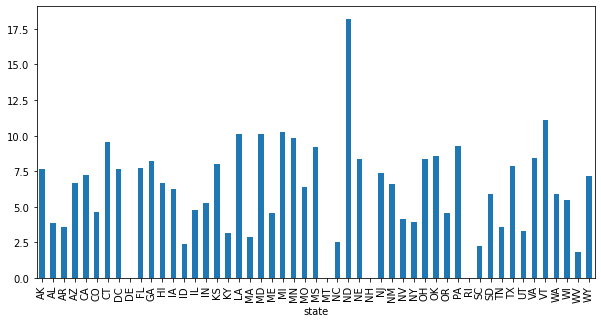

In [24]:
ax= unarmed_deaths['Yes_%'].plot.bar(figsize= (10,5))

In [25]:
print('North Dakota, Vermont and Maryland are the top three states with the highest unarmed death toll.')

North Dakota, Vermont and Maryland are the top three states with the highest unarmed death toll.


In [26]:
race_arm= pd.crosstab(df['race'], df['armed']=='unarmed', normalize= True)
race_arm.columns= ['No', 'Yes']
race_arm

,No,Yes
race,,
Asian,0.017569,0.001430
Black,0.240041,0.025128
Hispanic,0.171399,0.012870
Native American,0.015117,0.000817
Others,0.008784,0.001021
White,0.475996,0.029826


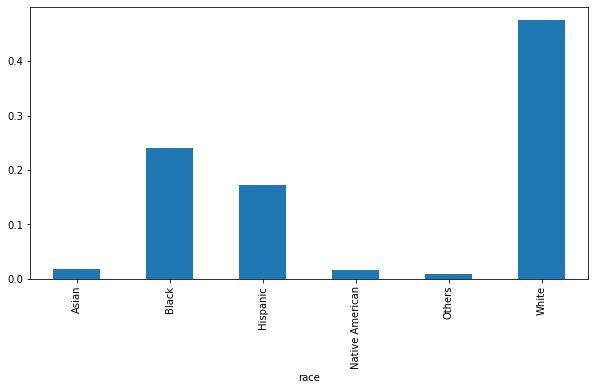

In [27]:
ax= race_arm['No'].plot.bar(figsize= (10,5))

## Mental Illness Analysis

In [28]:
mental_illness= df['signs_of_mental_illness'].value_counts()
mental_illness

False    4200
True     1216
Name: signs_of_mental_illness, dtype: int64

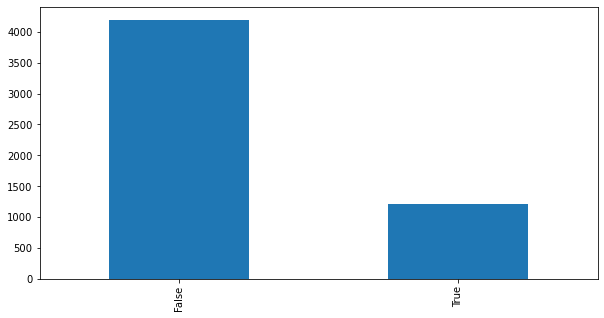

In [29]:
ax= mental_illness.plot.bar(figsize= (10,5))

In [30]:
mental_illness= pd.crosstab(df['state'], df['signs_of_mental_illness'])
mental_illness

signs_of_mental_illness,False,True
state,,
AK,33,6
AL,78,26
AR,70,13
AZ,207,47
CA,617,182
CO,170,25
CT,16,5
DC,11,2
DE,9,4


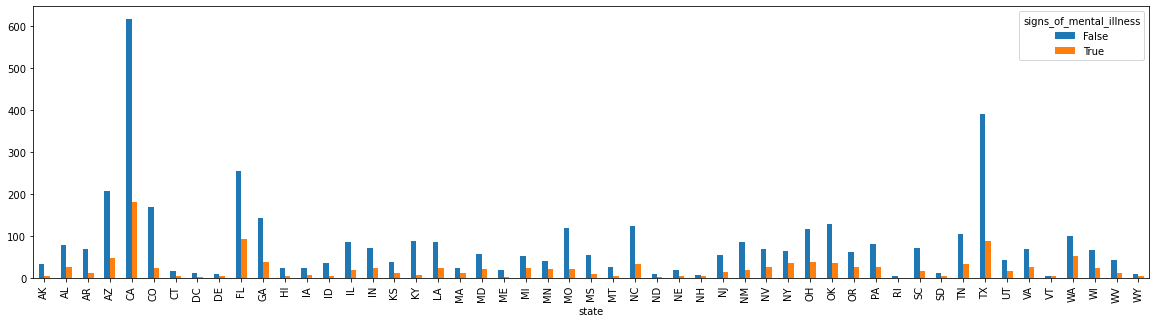

In [31]:
ax= mental_illness.plot.bar(figsize= (20,5))

In [32]:
print('California, texas and florida have the highest rates of police confrontations with possible citizens with signs of mental illness.')

California, texas and florida have the highest rates of police confrontations with possible citizens with signs of mental illness.
